# Preparing Time Series Data
Like most preparation processes, but now with dates!

In [7]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from env import user, password, host
import os
# from acquire import wrangle_store_data

import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

## Acquire
We'll start by loading up the data from mysql server.

In [5]:
# The following are functions contained in the accompanying acquire.py file

def get_db_url(database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

def get_store_data():
    '''
    Returns a dataframe of all store data in the tsa_item_demand database and saves a local copy as a csv file.
    '''
    query = '''
    SELECT *
    FROM items
    JOIN sales USING(item_id)
    JOIN stores USING(store_id) 
    '''
    
    df = pd.read_sql(query, get_db_url('tsa_item_demand'))
    
    df.to_csv('tsa_item_demand.csv', index=False)
    
    return df

def wrangle_store_data():
    filename = 'tsa_store_data.csv'
    
    if os.path.isfile(filename):
        df = pd.read_csv(filename, index_col=0)
    else:
        df = get_store_data()
        
    return df

In [2]:
# df = wrangle_store_data()
df = pd.read_csv('tsa_item_demand.csv')

In [3]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [6]:
df.shape

(913000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   store_id       913000 non-null  int64  
 1   item_id        913000 non-null  int64  
 2   item_upc14     913000 non-null  int64  
 3   item_upc12     913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   sale_id        913000 non-null  int64  
 8   sale_date      913000 non-null  object 
 9   sale_amount    913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_zipcode  913000 non-null  int64  
 12  store_city     913000 non-null  object 
 13  store_state    913000 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 97.5+ MB


In [10]:
df.tail()

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
912995,50,63.0,"Wed, 27 Dec 2017 00:00:00 GMT",912996,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.2,47445919221,47445919221
912996,50,59.0,"Thu, 28 Dec 2017 00:00:00 GMT",912997,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.2,47445919221,47445919221
912997,50,74.0,"Fri, 29 Dec 2017 00:00:00 GMT",912998,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.2,47445919221,47445919221
912998,50,62.0,"Sat, 30 Dec 2017 00:00:00 GMT",912999,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.2,47445919221,47445919221
912999,50,82.0,"Sun, 31 Dec 2017 00:00:00 GMT",913000,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.2,47445919221,47445919221


In [8]:
# sanity check for null values:
(df.isnull().sum() != 0 ).sum()

0

In [9]:
df.columns

Index(['store_id', 'item_id', 'item_upc14', 'item_upc12', 'item_brand',
       'item_name', 'item_price', 'sale_id', 'sale_date', 'sale_amount',
       'store_address', 'store_zipcode', 'store_city', 'store_state'],
      dtype='object')

In [11]:
# how many unique stores?
df.store_address.nunique()

10

In [13]:
# how many unique items?
df.item_name.nunique()

50

In [14]:
df.sale_date.nunique()

1826

In [15]:
# number of unique timestamps * number of unique items * number of unique stores
(1826 * 10 * 50) == df.shape[0]

True

In [17]:
# does everything end with a junk timestamp?
(~df.sale_date.str.endswith(' 00:00:00 GMT')).sum()

913000

In [18]:
df.sale_date.min()

'2013-01-01'

In [19]:
df.sale_date.max()

'2017-12-31'

In [28]:
# df.sale_date.str.replace(' 00:00:00 GMT', '')

In [22]:
# because everything ends with this zero timestamp,
# I'm going to go ahead and cut it off with a replace
# before converting it to a pandas datetime
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [23]:
df.sale_date

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

In [24]:
# does our min match our old min?
df.sale_date.min()

Timestamp('2013-01-01 00:00:00')

In [25]:
df.sale_date.max()

Timestamp('2017-12-31 00:00:00')

In [26]:
pd.to_datetime(df.sale_date)

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

In [27]:
# reassign this new formatted datetime to our index
df = df.set_index('sale_date').sort_index()

In [28]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX


# Defining observations:

In [35]:
# when we examined the unique number of items, stores, and dates
# present in our data set, we observed that the size of the dataframe
# is the number of days we have data for multiplied by the number of stores and by the
# number of items,
# meaning that each row is an assessment of a specific item at a specific store that day

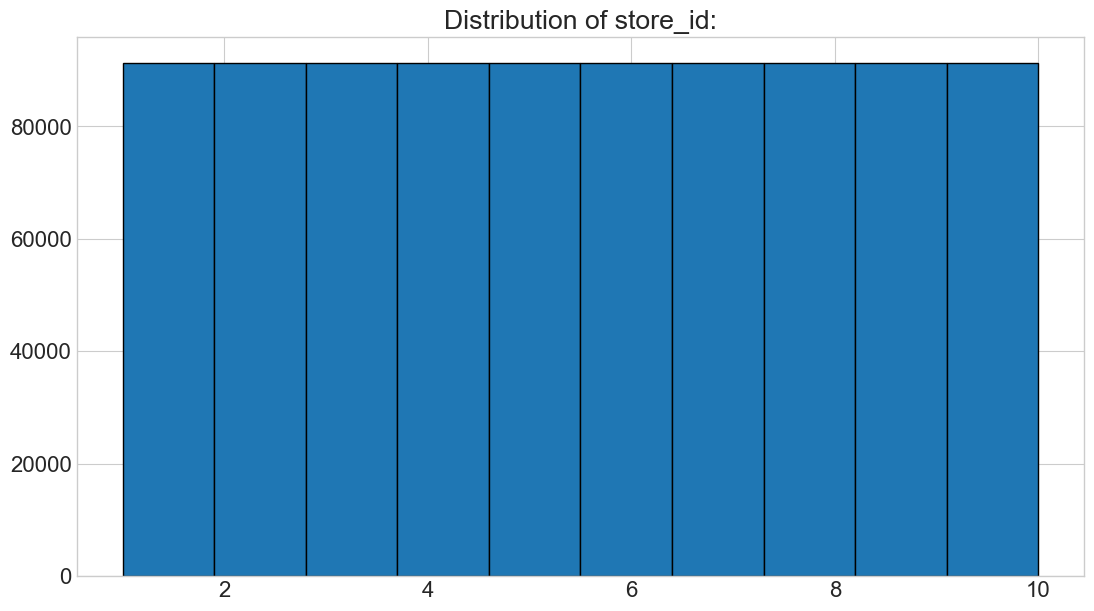

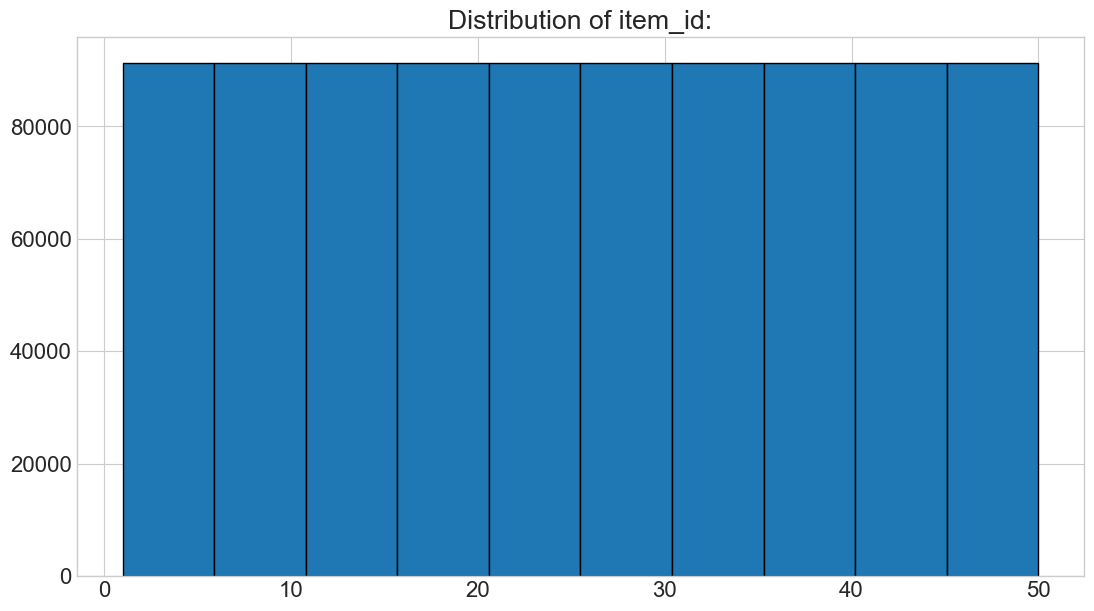

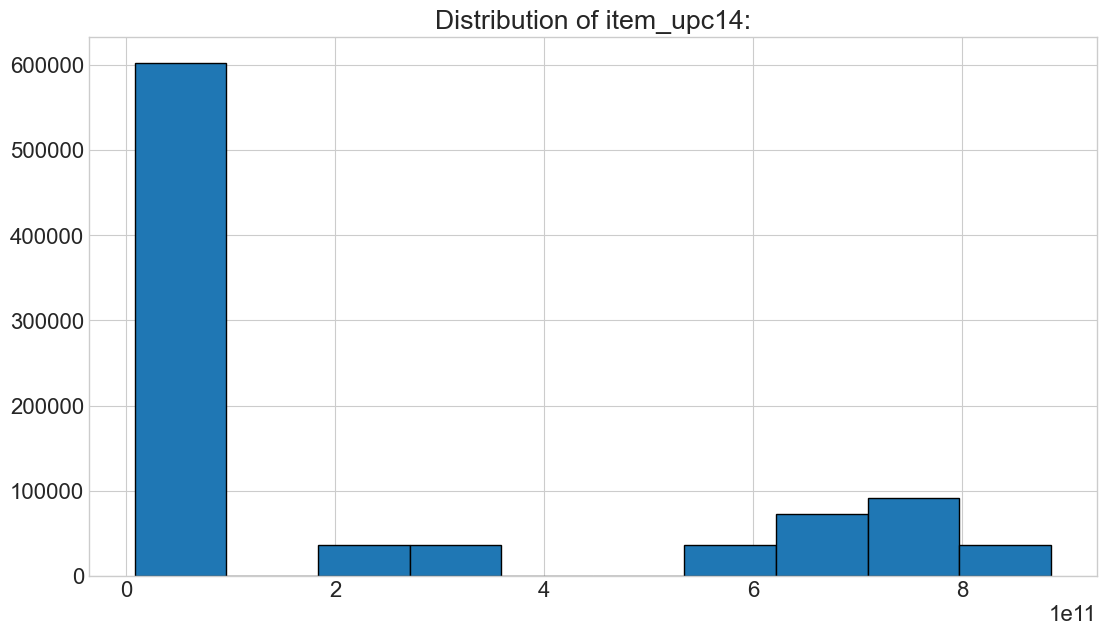

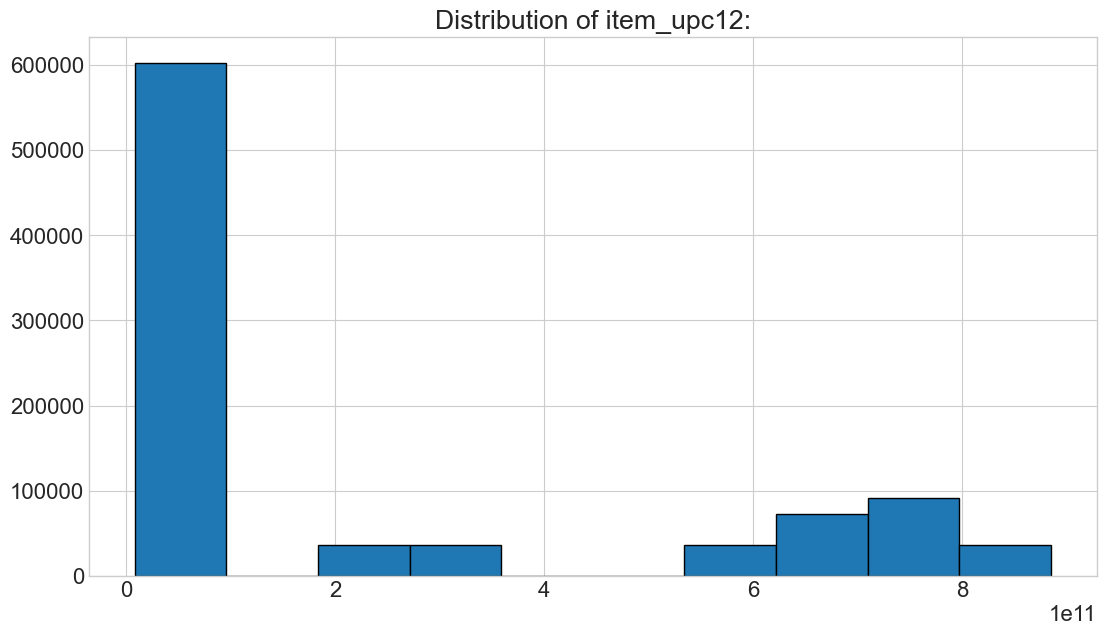

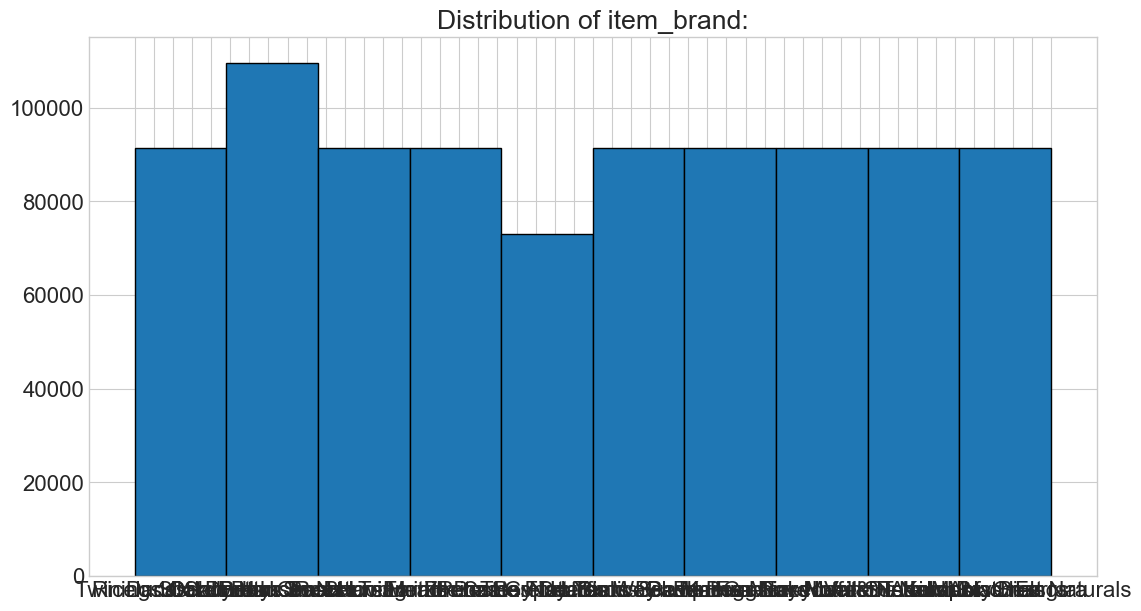

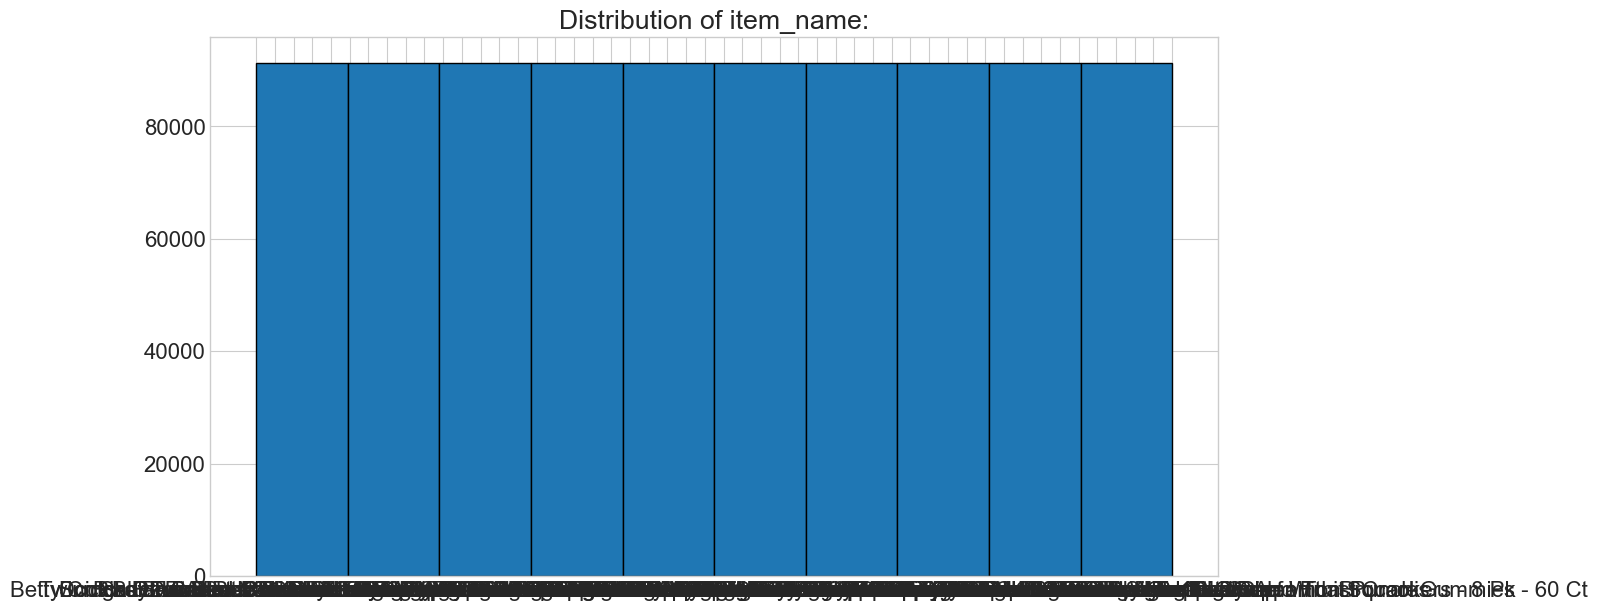

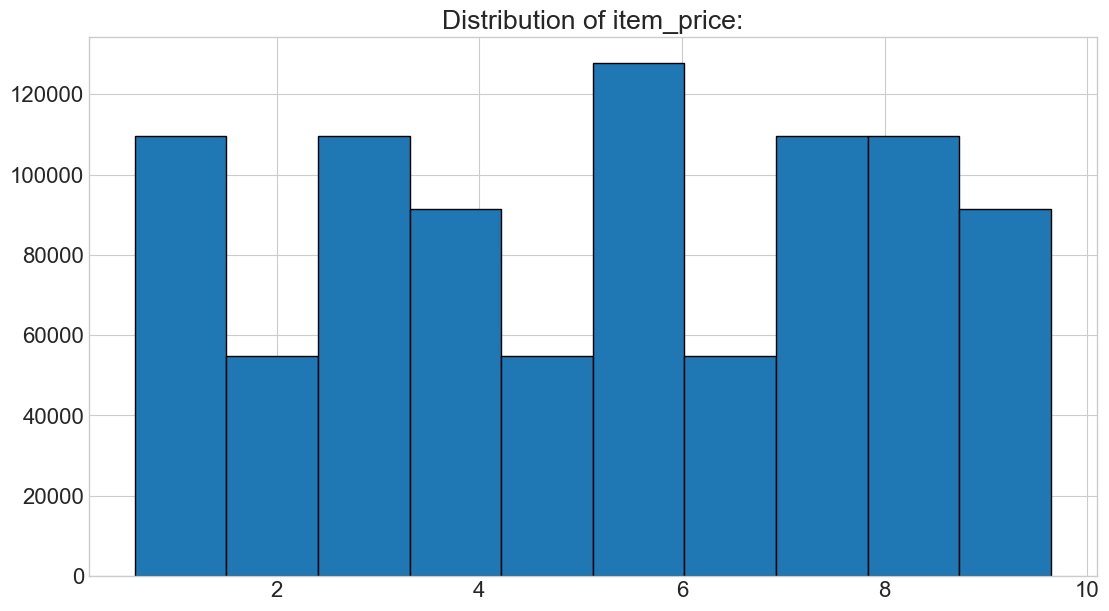

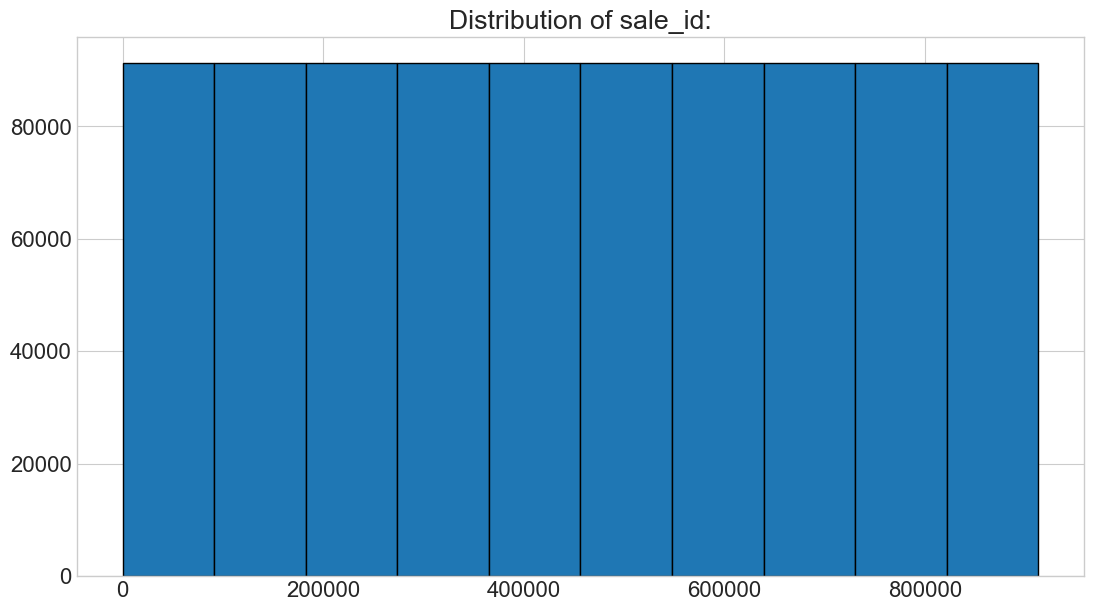

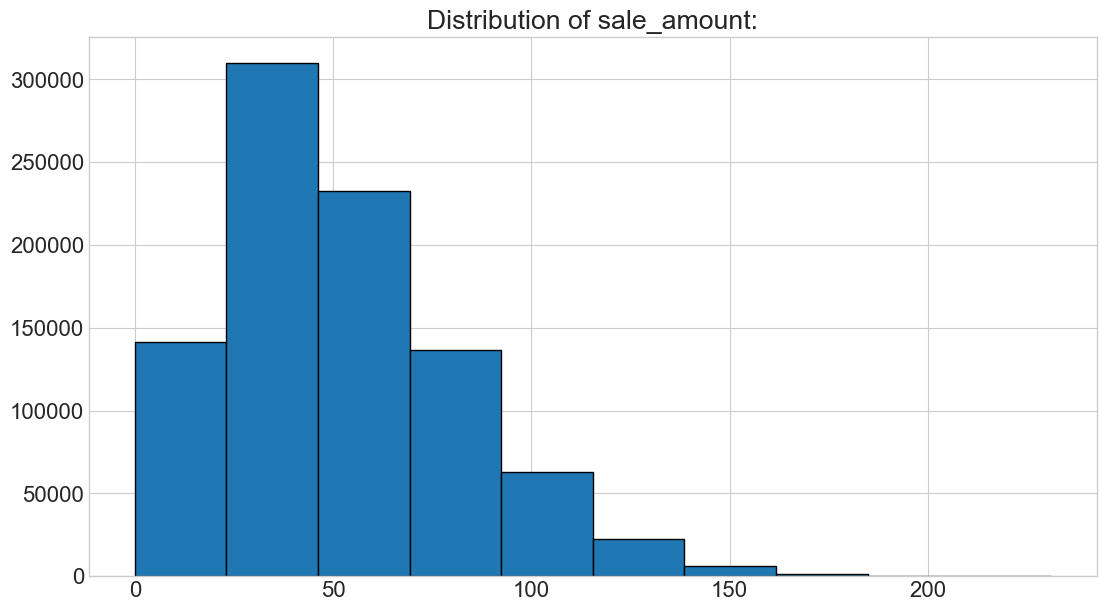

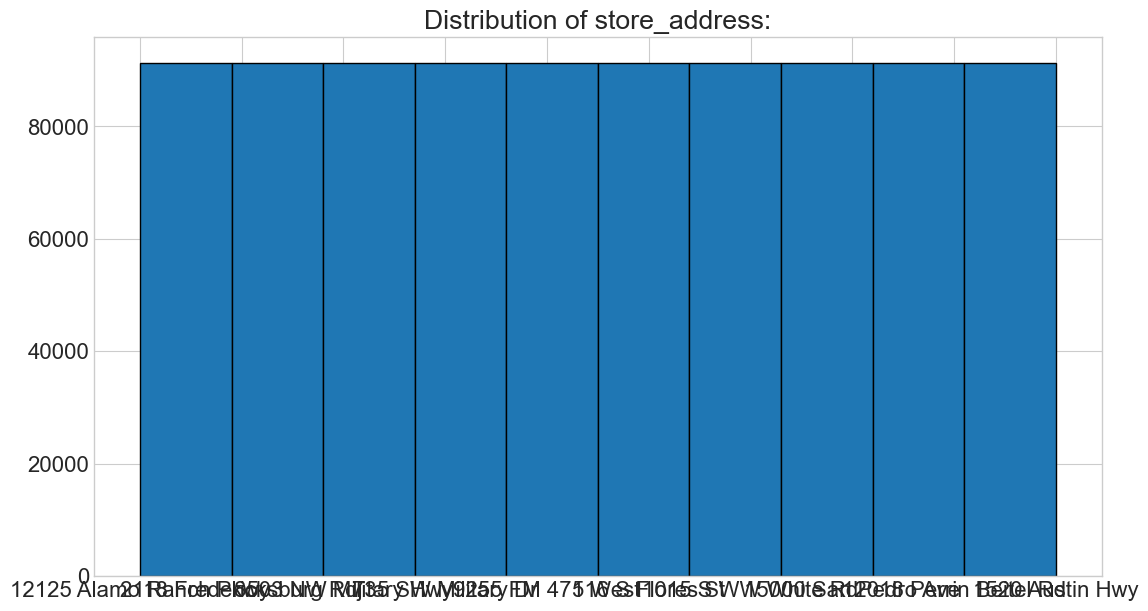

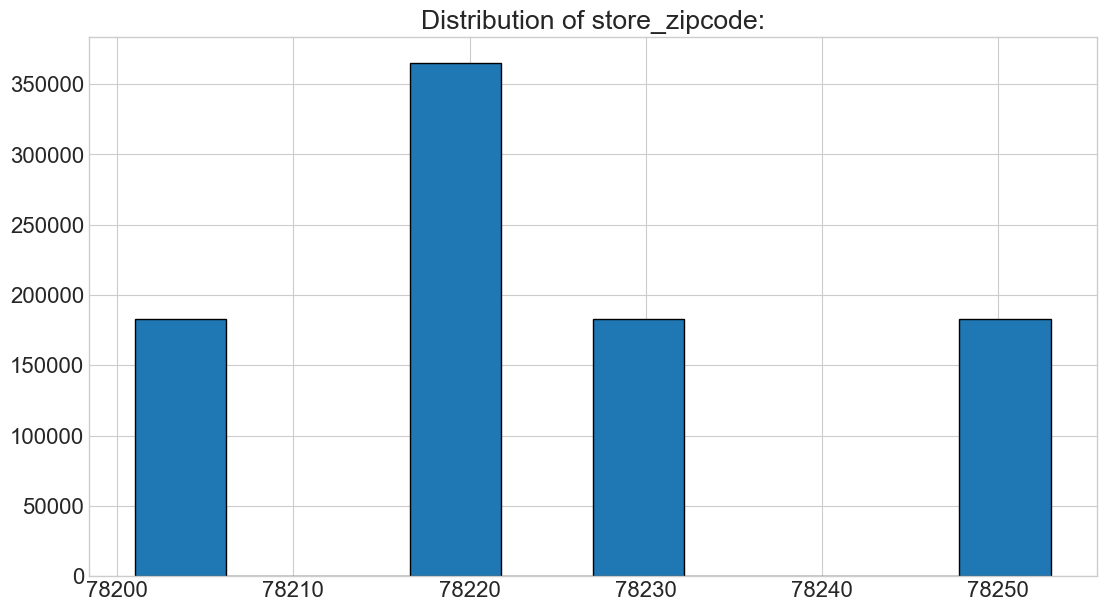

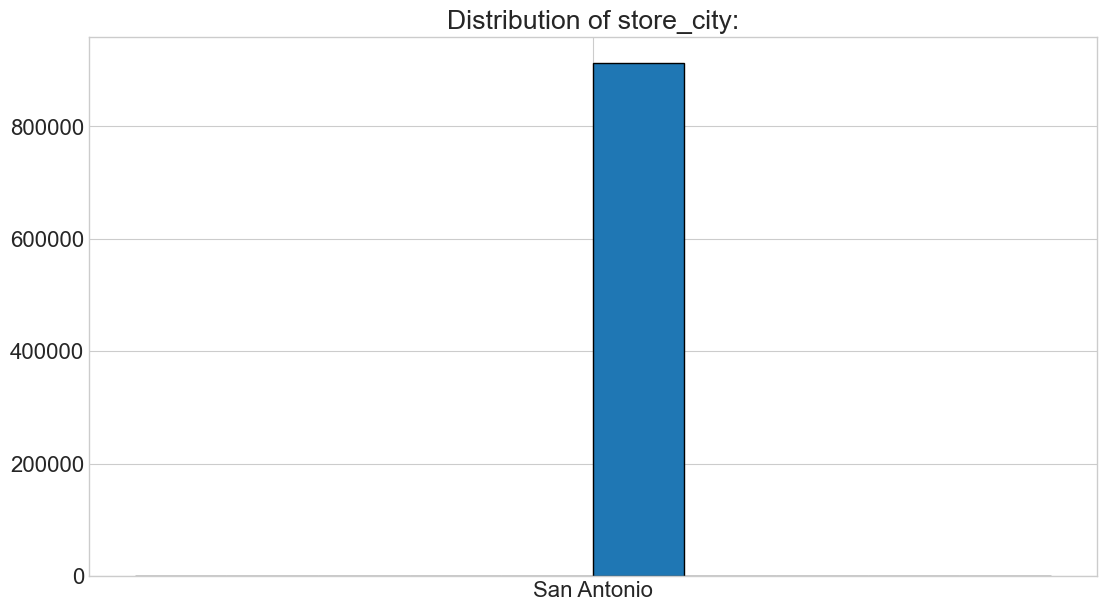

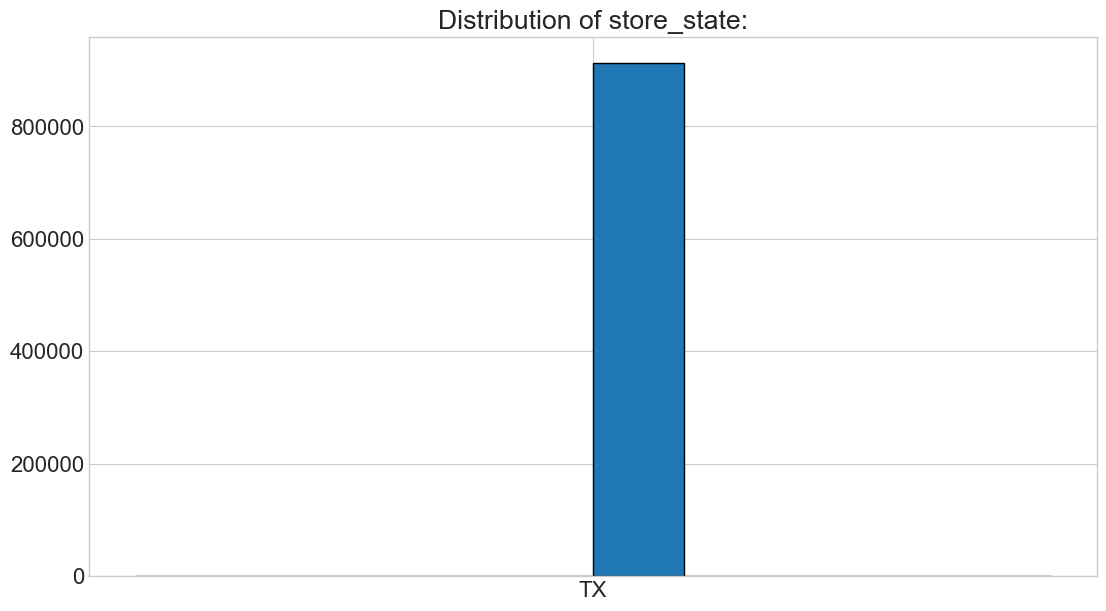

In [29]:
for col in df.columns:
    plt.hist(df[col], edgecolor='black')
    plt.title(f'Distribution of {col}:')
    plt.show()

We appear to have some information here in regard to the scope of what sales look like over the course of these instances of store/item/day combinations
 
 Where we see flux seems to incur on sales, where we see that there are more instances that sit in the middle than those that are in the lower or higher areas, resembling something a bit more normal than the other columns

In [30]:
by_date = df.groupby('sale_date').sale_amount.sum().reset_index()

<AxesSubplot:xlabel='sale_date'>

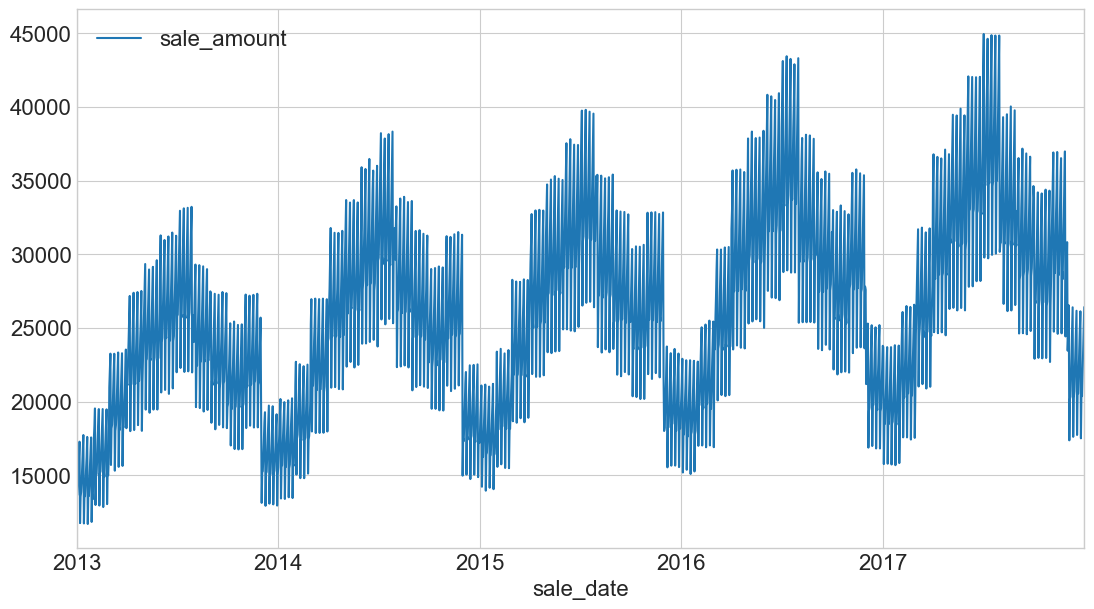

In [31]:
by_date.plot(x='sale_date', y='sale_amount')

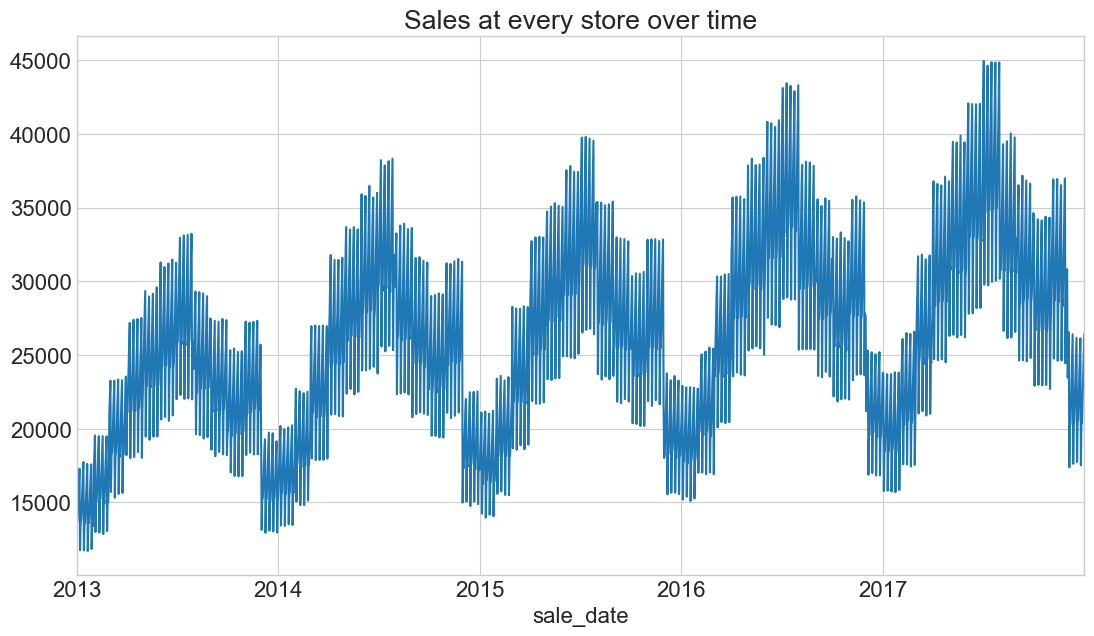

In [32]:
df.groupby('sale_date').sale_amount.sum().plot()
plt.title('Sales at every store over time')
plt.show()

In [33]:
# Are stores represented equally? Histograms seem to say yes
(df.store_id.value_counts() != 91300).sum() == 0

True

In [34]:
# Are items represented equally?
(df.item_id.value_counts() != 18260).sum() == 0

True

In [49]:
# So for each slot we have represented,
# there is a space made for store and for item, regardless of sales numbers
# on that specific dat

In [50]:
# Based on the numbers that we have so far:

We have:
 - 50 items
 - 10 stores
 - 18260 sales for each item
 
Based on this, do we have a congruent initial sale date?

In [35]:
first_sales = df.reset_index().groupby(['store_id', 'item_id']).sale_date.min()

In [37]:
first_sales.unique()

array(['2013-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [38]:
first_sales.nunique()

1

In [39]:
last_sales = df.reset_index().groupby(['store_id', 'item_id']).sale_date.max()

In [40]:
last_sales.nunique()

1

In [41]:
last_sales.unique()

array(['2017-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [42]:
df.reset_index().groupby(['store_id','item_id']).sale_date.nunique()

store_id  item_id
1         1          1826
          2          1826
          3          1826
          4          1826
          5          1826
                     ... 
10        46         1826
          47         1826
          48         1826
          49         1826
          50         1826
Name: sale_date, Length: 500, dtype: int64

In [43]:
n_days = df.index.max() - df.index.min() + pd.Timedelta('1d')

In [44]:
n_days

Timedelta('1826 days 00:00:00')

In [45]:
df.index.nunique()

1826

In [47]:
# reproduce this:
def prepare_store_data(df):
    '''
    Takes in store data as loaded,
    cleans the datetime and turns it to a pandas datetime,
    which is then set as the index
    
    Return: pandas DF
    '''
    df['sale_date'] = pd.to_datetime(df.sale_date)
    df = df.set_index('sale_date').sort_index()
    return df

# Exercises
## Part 1

### Convert date column to datetime format.
Plot the distribution of sale_amount and item_price.
Set the index to be the datetime variable.

### Add a 'month' and 'day of week' column to your dataframe.

In [51]:
df['month_name'] = df.index.month_name()

In [53]:
df['day_of_week'] = df.index.day_name()

### Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [56]:
df['sales_total'] = df['sale_amount'] * df['item_price']

### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [57]:
def prepare_items():
    '''
    Actions: gets data and prepares data for exploration
    '''
    # get data
    df = pd.read_csv('tsa_item_demand.csv')
    
    # converting date to date_time format
    df['sale_date'] = pd.to_datetime(df['sale_date'])
    
    # setting index tot he datetime
    df = df.set_index('sale_date').sort_index()
    
    # adding new columns
    df['month_name'] = df.index.month_name()
    df['day_of_week'] = df.index.day_name()
    df['sales_total'] = df['sale_amount'] * df['item_price']
    
    return df

In [58]:
# testing

In [1]:
from prepare import prepare_items

In [2]:
# easy peasy
df = prepare_items()

In [4]:
# perfect
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month_name,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


In [5]:
# success
df.columns

Index(['store_id', 'item_id', 'item_upc14', 'item_upc12', 'item_brand',
       'item_name', 'item_price', 'sale_id', 'sale_amount', 'store_address',
       'store_zipcode', 'store_city', 'store_state', 'month_name',
       'day_of_week', 'sales_total'],
      dtype='object')

##  Part 2

In [6]:
from acquire import get_api_page

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [11]:
df.to_csv('opsd_germany_daily.csv')

### Convert date column to datetime format.

In [13]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [19]:
# creting python friendly names
df.columns = df.columns.str.lower().str.replace('+', '_')

In [21]:
# date is a string
df.dtypes

date            object
consumption    float64
wind           float64
solar          float64
wind_solar     float64
dtype: object

In [23]:

# converting dates to datetime
df.date = pd.to_datetime(df.date)

### Plot the distribution of each of your variables.

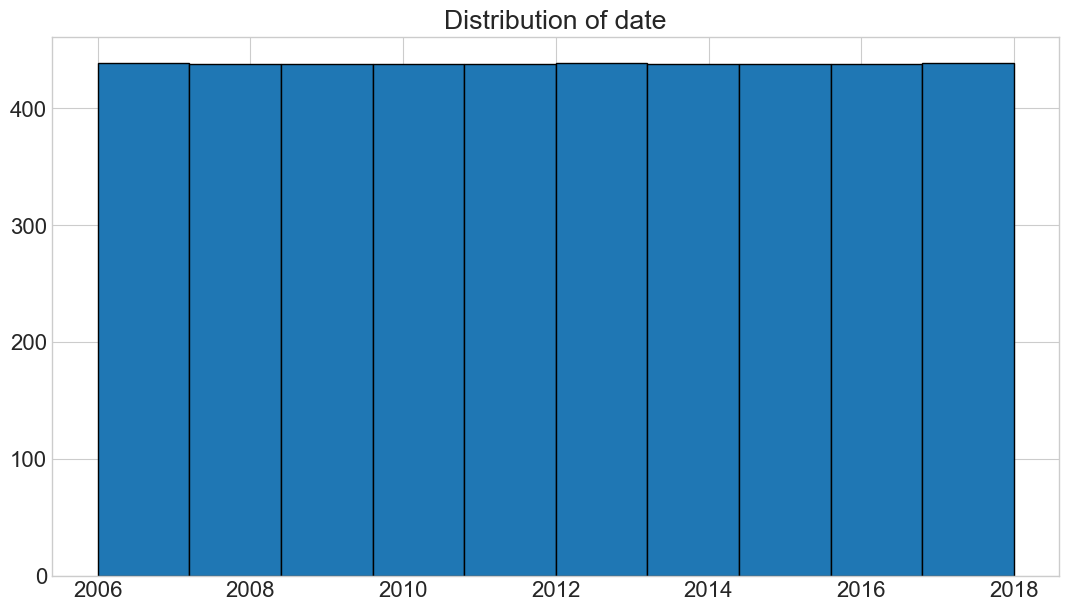

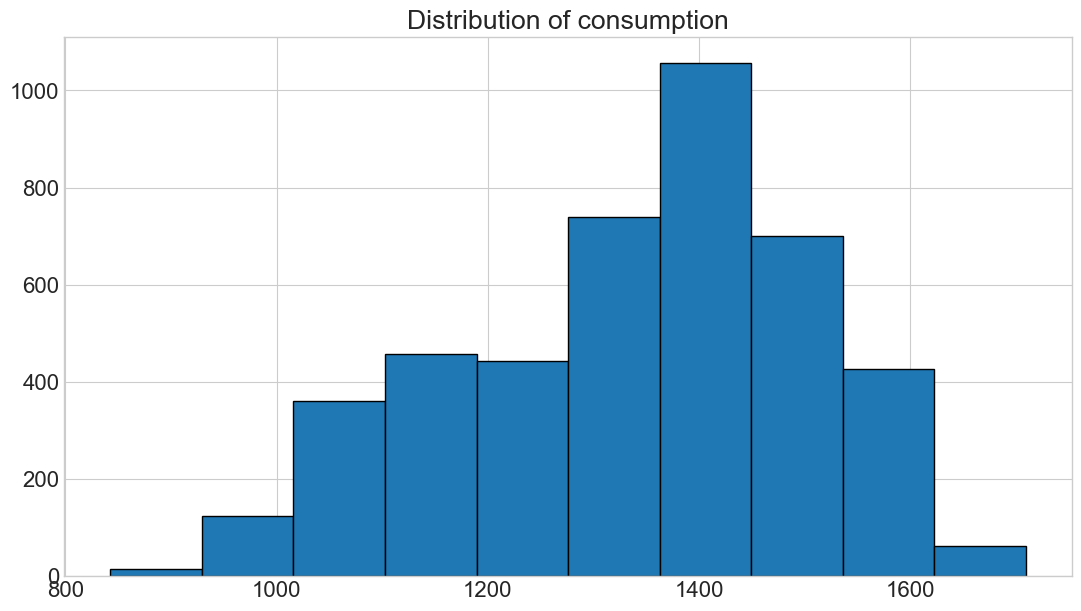

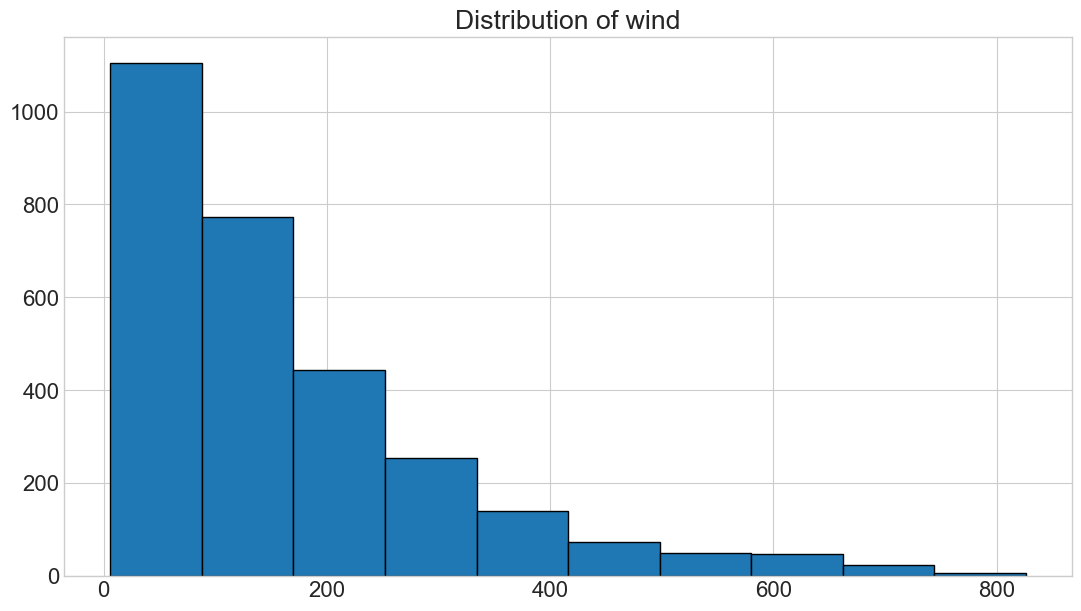

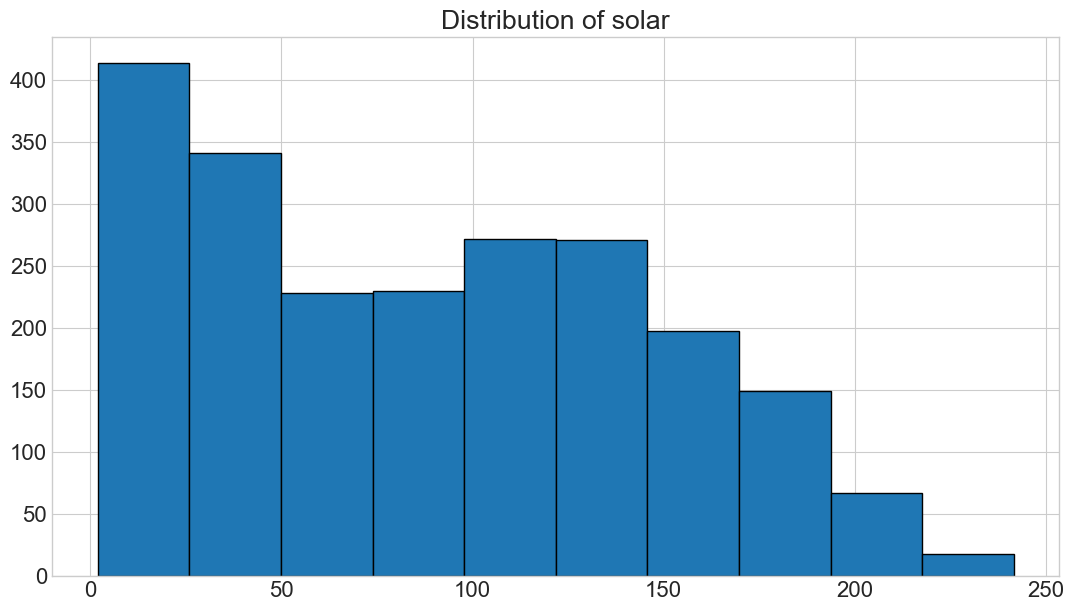

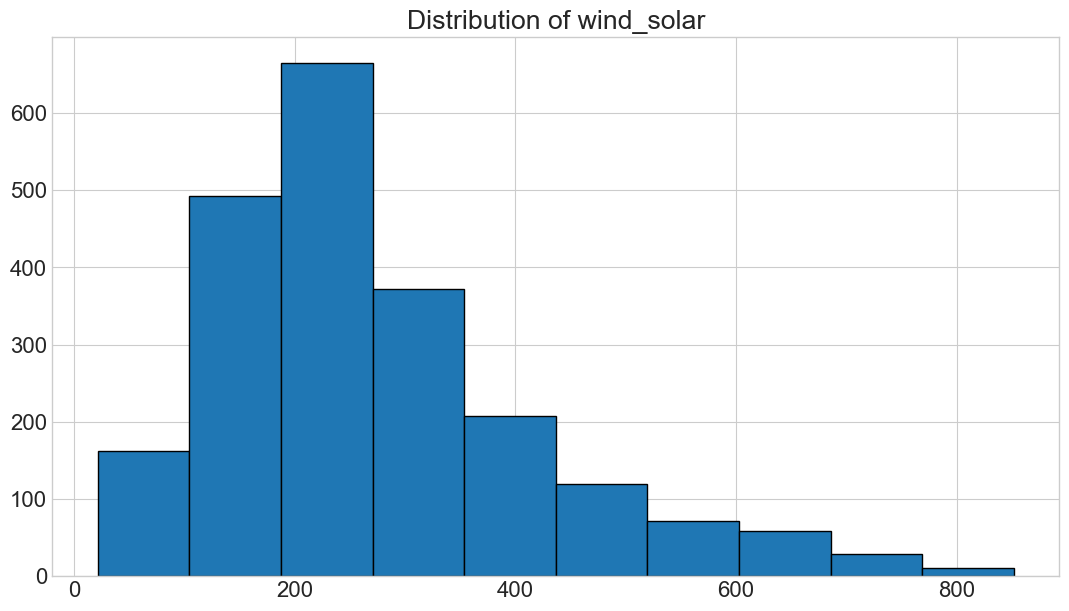

In [27]:
for col in df:
    df[col].hist(ec='black')
    plt.title(f'Distribution of {col}')
    plt.show()

### Set the index to be the datetime variable.

In [29]:

# setting index
df = df.set_index('date')

### Add a month and a year column to your dataframe.

In [31]:

# setting month
df['month'] = df.index.month_name()

In [32]:

# setting daye
df['day'] = df.index.day_name()

### Fill any missing values.

In [34]:
# browsing
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4383 non-null   float64
 1   wind         2920 non-null   float64
 2   solar        2188 non-null   float64
 3   wind_solar   2187 non-null   float64
 4   month        4383 non-null   object 
 5   day          4383 non-null   object 
dtypes: float64(4), object(2)
memory usage: 239.7+ KB


the missing values are in wind, solar, and wind and solar. let's check to see if this is a column issue or row issue

In [35]:
def nulls_by_col(df):
    '''
    This function takes in a dataframe 
    and finds the number of missing values
    it returns a new dataframe with quantity and percent of missing values
    '''
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    percent_missing = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': percent_missing})
    return cols_missing.sort_values(by='num_rows_missing', ascending=False)

In [37]:
nulls_by_col(df)

,num_rows_missing,percent_rows_missing
wind_solar,2196,50.102669
solar,2195,50.079854
wind,1463,33.378964
consumption,0,0.000000
month,0,0.000000
day,0,0.000000


In [38]:
def nulls_by_row(df):
    '''
    This function takes in a dataframe 
    and finds the number of missing values in a row
    it returns a new dataframe with quantity and percent of missing values
    '''
    num_missing = df.isnull().sum(axis=1)
    percent_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': percent_miss})
    rows_missing = df.merge(rows_missing,
                        left_index=True,
                        right_index=True)[['num_cols_missing', 'percent_cols_missing']]
    return rows_missing.sort_values(by='num_cols_missing', ascending=False)

In [40]:
nulls_by_row(df)['num_cols_missing'].value_counts()

0    2187
3    1462
2     734
Name: num_cols_missing, dtype: int64

In [41]:
df.wind.value_counts()

21.540     2
193.681    2
96.107     2
34.973     2
229.770    2
          ..
35.317     1
19.479     1
33.386     1
64.503     1
721.176    1
Name: wind, Length: 2913, dtype: int64

When filling missing values related to time

In [46]:
df = df.fillna(method='bfill')

,consumption,wind,solar,wind_solar,month,day
date,,,,,,
2006-01-01,1069.18400,48.709,6.587,234.052,January,Sunday
2006-01-02,1380.52100,48.709,6.587,234.052,January,Monday
2006-01-03,1442.53300,48.709,6.587,234.052,January,Tuesday
2006-01-04,1457.21700,48.709,6.587,234.052,January,Wednesday
2006-01-05,1477.13100,48.709,6.587,234.052,January,Thursday
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,December,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,December,Friday


<AxesSubplot:xlabel='date'>

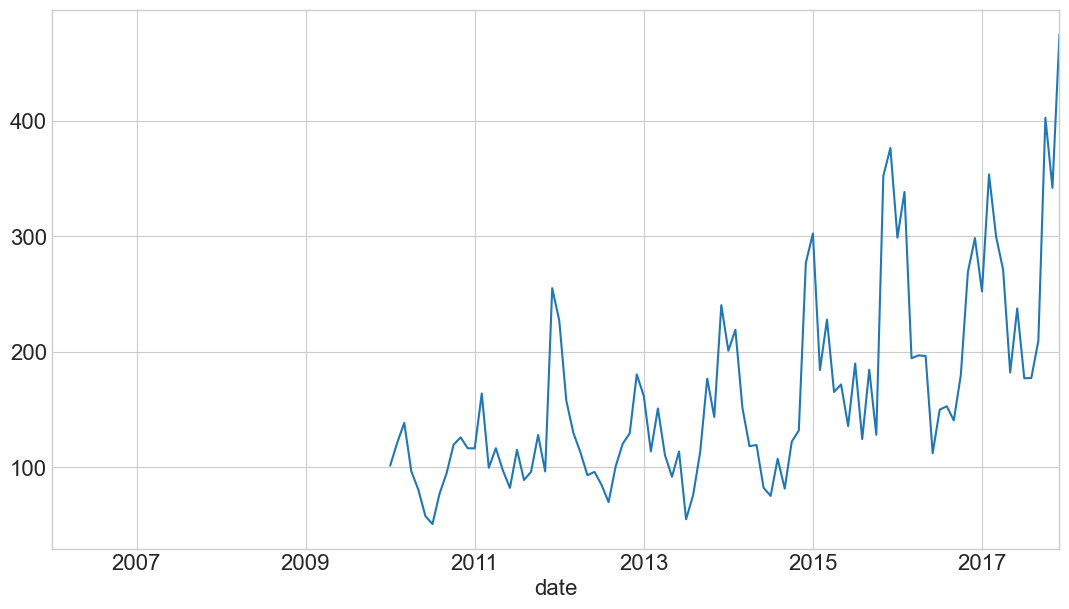

In [50]:
df.wind.resample('M').mean().plot()

<AxesSubplot:xlabel='date'>

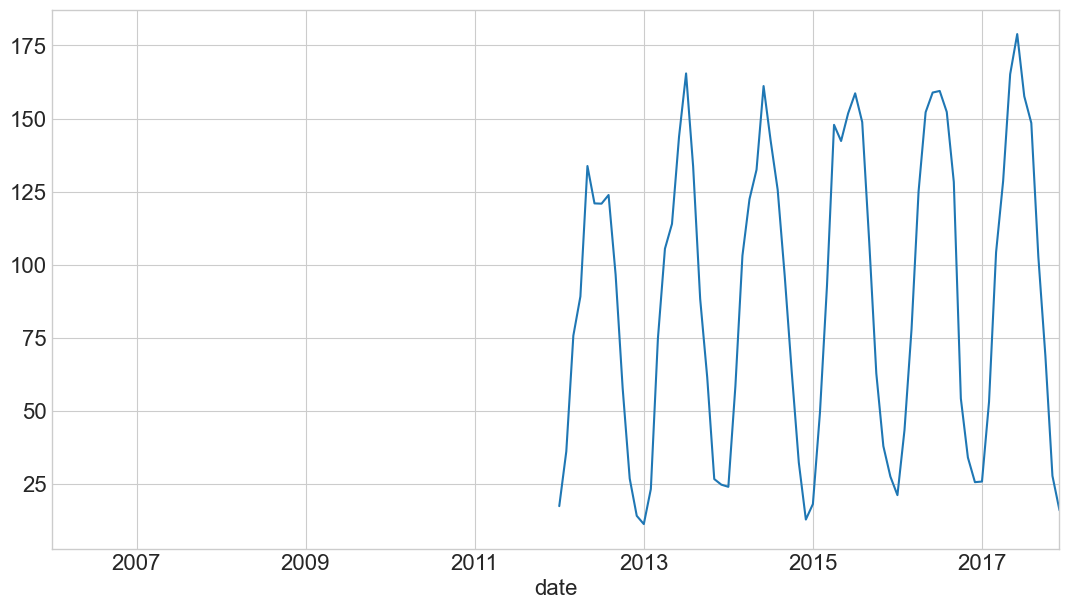

In [52]:
df.solar.resample('M').mean().plot()

<AxesSubplot:xlabel='date'>

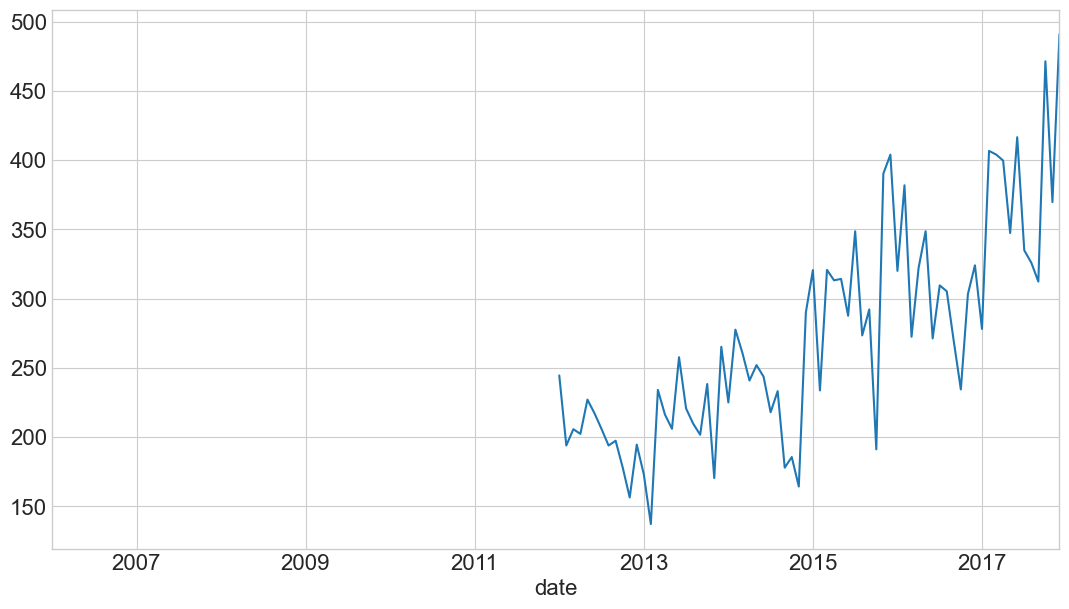

In [55]:
df.wind_solar.resample('M').mean().plot()

In [59]:
# there is wayy too much data missing so I will drop the nulls 
df.dropna().shape, df.shape

((2187, 6), (4383, 6))

In [ ]:
df.dropna(inplace=True)

### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
def prepare_opsd():
    '''
    Actions: gets data, creates new columns, and drops null values
    '''
    
    # set file name
    filename = 'opsd_germany_daily.csv'

    # if the file exists
    if os.path.exists(filename):
        
        # read the csv 
        df = pd.read_csv(filename, index_col=0)
        
    
    # otherwise
    else:
        
        # get data
        df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

    # creating python friendly names
    df.columns = df.columns.str.lower().str.replace('+', '_')

    # converting dates to datetime
    df.date = pd.to_datetime(df.date)

    # setting index
    df = df.set_index('date')

    # setting month
    df['month'] = df.index.month_name()

    # setting day
    df['day'] = df.index.day_name()
    
    # drop nulls
    df.dropna(inplace=True)
    
    return df

In [2]:
# testing import
from prepare import prepare_opsd

df = prepare_opsd()

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2187 entries, 2012-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  2187 non-null   float64
 1   wind         2187 non-null   float64
 2   solar        2187 non-null   float64
 3   wind_solar   2187 non-null   float64
 4   month        2187 non-null   object 
 5   day          2187 non-null   object 
dtypes: float64(4), object(2)
memory usage: 119.6+ KB


/Users/aaron/codeup-data-science/time-series-exercises/prepare.py:51: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.lower().str.replace('+', '_')


In [3]:
df.head()

,consumption,wind,solar,wind_solar,month,day
date,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,January,Sunday
2012-01-02,1269.581,207.327,6.574,213.901,January,Monday
2012-01-03,1334.745,473.468,24.679,498.147,January,Tuesday
2012-01-04,1347.136,499.804,14.681,514.485,January,Wednesday
2012-01-05,1376.658,523.851,5.071,528.922,January,Thursday
